In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
def load_images_from_folder(folder, img_size=(128, 128), dtype = 'float32'):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    image = cv2.resize(image, img_size)
                    # image = image / 255.0  # Normalize
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels)


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the folder paths for training and testing images
train_folder = 'data/leaf/train'
test_folder = 'data/leaf/test'

# Define a dictionary to map folder names to labels
disease_labels = {folder_name: i for i, folder_name in enumerate(os.listdir(train_folder))}
print("Disease Labels Mapping:", disease_labels)  # Optional: print to verify

# Function to load images and labels from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for disease_folder in os.listdir(folder):
        label = disease_labels[disease_folder]  # Get the label based on the folder name
        disease_path = os.path.join(folder, disease_folder)
        for image_name in os.listdir(disease_path):
            image_path = os.path.join(disease_path, image_name)
            # Load the image using OpenCV
            image = cv2.imread(image_path)
            # Convert BGR to RGB for matplotlib
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            labels.append(label)
    return images, labels

# Load training and testing images and labels
train_images, train_labels = load_images_from_folder(train_folder)


Disease Labels Mapping: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___healthy': 5, 'Cherry_(including_sour)___Powdery_mildew': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9, 'Corn_(maize)___Northern_Leaf_Blight': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___healthy': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___healthy': 21, 'Potato___Late_blight': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___h

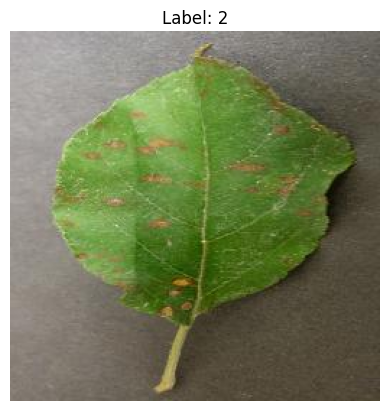

In [10]:
def show_first_image_of_label(images, labels, target_label):
    """
    Displays the first image of a specific label.
    """
    for image, label in zip(images, labels):
        if label == target_label:
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Label: {target_label}")
            plt.show()
            break
    else:
        print(f"No image found with the target label: {target_label}")

# Example usage: Display the first image of label 0
target_label = 2  # Replace with the desired label
show_first_image_of_label(train_images, train_labels, target_label)


In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

# Define paths
train_folder = 'data/leaf/train'
augmented_folder = 'data/leaf/augmented_train'
os.makedirs(augmented_folder, exist_ok=True)  # Create folder for augmented images if it doesn't exist


In [19]:
def augment_image_with_rotation(image, rotation_step=10):
    """Apply rotation to an image in specified degree increments."""
    augmented_images = []
    height, width = image.shape[:2]

    # Rotate from 0 to 350 degrees in increments of `rotation_step`
    for angle in range(0, 360, rotation_step):
        # Get the rotation matrix for the current angle
        rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1.0)
        # Rotate the image using the matrix
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
        augmented_images.append(rotated_image)

    return augmented_images


In [20]:
# def augment_image(image):
#     """Apply a series of augmentations to an image."""
#     augmented_images = []
    
#     # Original image
#     augmented_images.append(image)
    
#     # Rotate 90 degrees clockwise, 90 degrees counterclockwise, and 180 degrees
#     rotated_90_cw = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
#     rotated_90_ccw = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     rotated_180 = cv2.rotate(image, cv2.ROTATE_180)
    
#     augmented_images.extend([rotated_90_cw, rotated_90_ccw, rotated_180])
    
#     # Flip horizontally and vertically
#     flipped_horizontal = cv2.flip(image, 1)
#     flipped_vertical = cv2.flip(image, 0)
#     augmented_images.extend([flipped_horizontal, flipped_vertical])
    
#     return augmented_images


In [21]:
def preprocess_and_augment_data(input_folder, output_folder):
    """Preprocess and augment the dataset, saving augmented images in the specified folder."""
    labels = {}
    current_label = 0  # Starting label for the classes

    for disease_folder in tqdm(os.listdir(input_folder), desc="Processing Folders"):
        # Create subfolder in output for each disease category
        disease_input_path = os.path.join(input_folder, disease_folder)
        disease_output_path = os.path.join(output_folder, disease_folder)
        os.makedirs(disease_output_path, exist_ok=True)

        # Assign a unique label to each disease category
        labels[disease_folder] = current_label
        current_label += 1

        # Process each image in the disease folder
        for image_name in os.listdir(disease_input_path):
            image_path = os.path.join(disease_input_path, image_name)
            image = cv2.imread(image_path)

            # Skip any files that aren't images
            if image is None:
                continue

            # Augment the image and save all variants
            augmented_images = augment_image(image)
            for i, aug_img in enumerate(augmented_images):
                output_image_path = os.path.join(disease_output_path, f"{os.path.splitext(image_name)[0]}_aug_{i}.jpg")
                cv2.imwrite(output_image_path, aug_img)

    return labels

# Apply augmentation
labels_dict = preprocess_and_augment_data(train_folder, augmented_folder)
print("Labels dictionary:", labels_dict)


Processing Folders: 100%|██████████| 38/38 [20:49<00:00, 32.89s/it]

Labels dictionary: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___healthy': 5, 'Cherry_(including_sour)___Powdery_mildew': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9, 'Corn_(maize)___Northern_Leaf_Blight': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___healthy': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___healthy': 21, 'Potato___Late_blight': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___health

In [37]:
import cv2
import numpy as np

def adjust_hsv(image):
    """Interactive tool to adjust HSV values for background removal."""
    def on_trackbar(val):
        lower_h = cv2.getTrackbarPos("Lower H", "Adjust HSV")
        lower_s = cv2.getTrackbarPos("Lower S", "Adjust HSV")
        lower_v = cv2.getTrackbarPos("Lower V", "Adjust HSV")
        upper_h = cv2.getTrackbarPos("Upper H", "Adjust HSV")
        upper_s = cv2.getTrackbarPos("Upper S", "Adjust HSV")
        upper_v = cv2.getTrackbarPos("Upper V", "Adjust HSV")
        
        lower_bound = np.array([lower_h, lower_s, lower_v])
        upper_bound = np.array([upper_h, upper_s, upper_v])
        
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        mask = cv2.inRange(hsv, lower_bound, upper_bound)
        mask_inv = cv2.bitwise_not(mask)
        result = cv2.bitwise_and(image, image, mask=mask_inv)
        
        cv2.imshow("Result", result)

    cv2.namedWindow("Adjust HSV")
    cv2.createTrackbar("Lower H", "Adjust HSV", 0, 180, on_trackbar)
    cv2.createTrackbar("Lower S", "Adjust HSV", 0, 255, on_trackbar)
    cv2.createTrackbar("Lower V", "Adjust HSV", 0, 255, on_trackbar)
    cv2.createTrackbar("Upper H", "Adjust HSV", 180, 180, on_trackbar)
    cv2.createTrackbar("Upper S", "Adjust HSV", 255, 255, on_trackbar)
    cv2.createTrackbar("Upper V", "Adjust HSV", 255, 255, on_trackbar)

    # Initial display
    on_trackbar(0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Load and convert an image to RGB for testing
image_path = "path_to_image.jpg"  # Replace with an actual image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjust_hsv(image)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
